# **Exercise: Object Detection with YOLO on Uploaded Images**

**Objective:** Detect and identify objects in images using the YOLO algorithm.



**Key Characteristics:**
YOLO ( You Only Look Once ) algorithm is ideal for locating and identifying objects in images in real time (e.g., traffic surveillance, autonomous vehicles, and security applications).

- Platform: Google Colab, with GPU acceleration for faster processing.
- Input Data: A .zip file containing multiple images.
- Model: YOLOv5, pre-trained on the COCO dataset, which recognizes 80 common object classes.
- Output: Detection results with bounding boxes and labels for each image, displayed inline in Colab and saved to a results folder.


In [3]:
# 01. SET UP THE RUNTIME ENVIRONMENT

# Go to Runtime > Change runtime type and select GPU as the Hardware accelerator.

In [2]:
# 02. INSTALL YOLOV5 AND DEPENDENCIES

# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17055, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 17055 (delta 17), reused 16 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17055/17055), 15.67 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (11707/11707), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 15.9 MB/s eta 0:00:00


In [1]:
# 03. UPLOAD IMAGE DIRECTLY TO GOOGLE COLAB

from google.colab import files
from pathlib import Path

# Interactively upload files
uploaded = files.upload()  # This opens a dialog box to select files

# Specify the target directory for uploaded images
target_dir = Path('/content/uploaded_images')  # Choose the desired path
target_dir.mkdir(parents=True, exist_ok=True)  # Create the directory if it doesn't exist

# Save the uploaded files to the specified location
for name, data in uploaded.items():
    save_path = target_dir / name  # Combine directory path with the file name
    with open(save_path, 'wb') as f:
        f.write(data)
    print(f"Saved {name} to {save_path}")


Saving dog.jpg to dog.jpg
Saved dog.jpg to /content/uploaded_images/dog.jpg


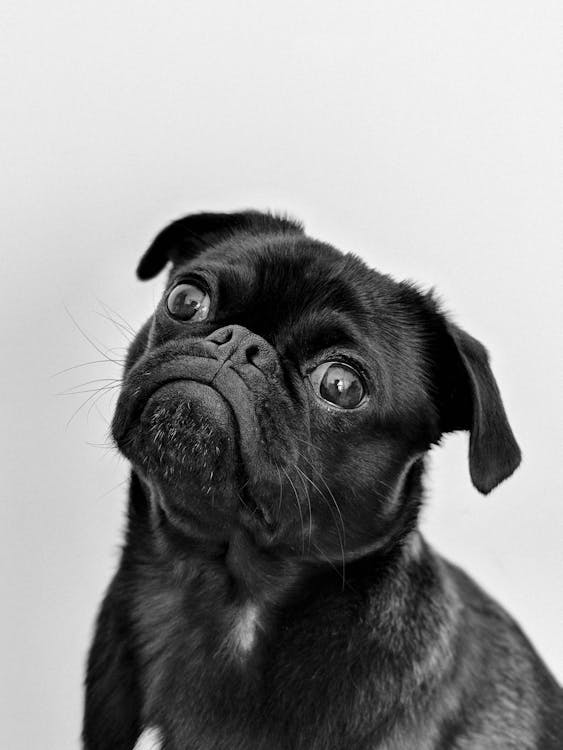

In [2]:
# 04. RUN YOLOv5 ALGORITHM ON THE UPLOADED IMAGE

import torch
from pathlib import Path
from IPython.display import Image, display

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Create a directory for detection results
detection_dir = Path('/content/image_detections')
detection_dir.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists

# Perform detection on each uploaded image
for img_path in target_dir.glob("*.jpg"):  # Process all .jpg files
    print(f"\nProcessing: {img_path}")
    results = model(img_path)  # Perform object detection
    results.print()  # Print detection results (class labels and confidence scores)

    # Manually save results to the fixed directory
    result_image_path = detection_dir / img_path.name  # Use the same name as the original image
    results.save(save_dir=str(detection_dir))  # Save all images with detections to the same folder

    # Ensure the processed image is saved correctly
    if result_image_path.exists():
        print(f"Displaying result for: {result_image_path}")
        display(Image(filename=str(result_image_path)))
    else:
        print(f"No processed image found for {img_path}")


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-23 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 163MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):



Processing: /content/uploaded_images/dog.jpg


image 1/1: 750x563 1 dog
Speed: 123.4ms pre-process, 364.8ms inference, 37.8ms NMS per image at shape (1, 3, 640, 480)
Saved 1 image to /content/image_detections2


No processed image found for /content/uploaded_images/dog.jpg


In [3]:
# 05. DOWNLOAD DETECTION RESULT (Optional)

import shutil
shutil.make_archive('detections', 'zip', '/content/image_detections')

# Then, download detections.zip by right-clicking it in the Colab file explorer on the left and selecting “Download.”

'/content/detections.zip'

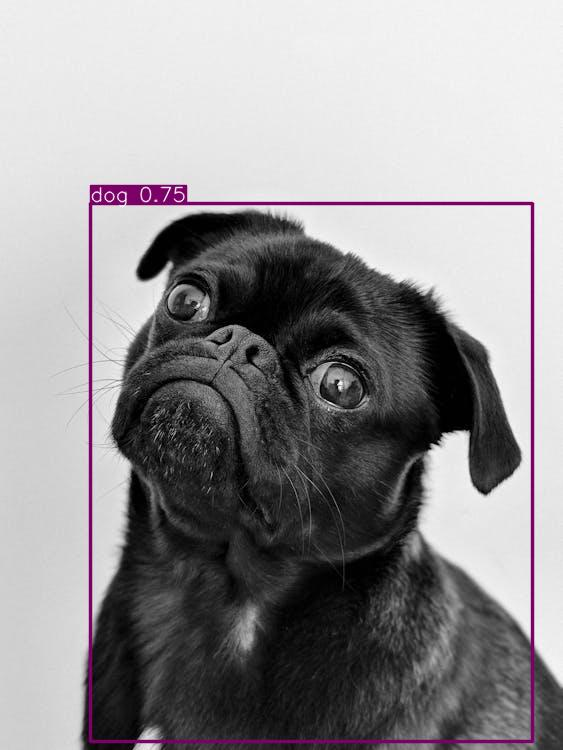